In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import src.util as utils

import importlib
importlib.reload(utils)

<module 'src.util' from 'c:\\Users\\marwi\\OneDrive - Universität Potsdam\\Intro_to_ML\\temp\\uib-machine-learning\\assignment-2\\src\\util.py'>

In [2]:
# Loading the given data files
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

In [3]:
# Preprocessing step: Calling downsampling method from utils file in order to create a dataset with a equal amout of classes
downsampled_X, downsampled_y, unique_classes_downsampled, class_counts_downsampled = utils.downsampling(X, y)

In [4]:
# Splitting of Dataset
X_sampled, _, y_sampled, _ = train_test_split(downsampled_X, downsampled_y, stratify=downsampled_y, random_state=42)

# Preprocessing step: Flattening of images to a 1D Array
X_flattened = X_sampled.reshape(X_sampled.shape[0], -1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_flattened, y_sampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
# Finding the best hyperparameter combination for Random Forest Model with GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
randomForest_model = RandomForestClassifier()
# Performing a grid search in order to find the best combination of hyperparameters for model outcome
grid_search = GridSearchCV(estimator=randomForest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)



Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'max_depth': None, 'n_estimators': 200}


In [6]:
# Random Forest Model training and Cross Validation

# Create and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this number as needed

# Create a K-Fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy for each fold
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(cross_val_scores, start=1):
    print(f'Cross-Validation Fold {fold}: Accuracy = {score:.4f}')

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = cross_val_scores.mean()
std_deviation = cross_val_scores.std()

# Print the mean and standard deviation of accuracy
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation: {std_deviation:.4f}')

# Predictions on validation data
rf_prediction = rf_model.predict(X_val)

# Evaluate the model
rf_val_accuracy = accuracy_score(y_val, rf_prediction)

# Print validation evaluation results for Random Forest
print("Random Forest Validation Accuracy: ", rf_val_accuracy)

Cross-Validation Fold 1: Accuracy = 0.8807
Cross-Validation Fold 2: Accuracy = 0.8863
Cross-Validation Fold 3: Accuracy = 0.8745
Cross-Validation Fold 4: Accuracy = 0.8695
Cross-Validation Fold 5: Accuracy = 0.8739
Mean Accuracy: 0.8770
Standard Deviation: 0.0059
Random Forest Validation Accuracy:  0.8802301255230126


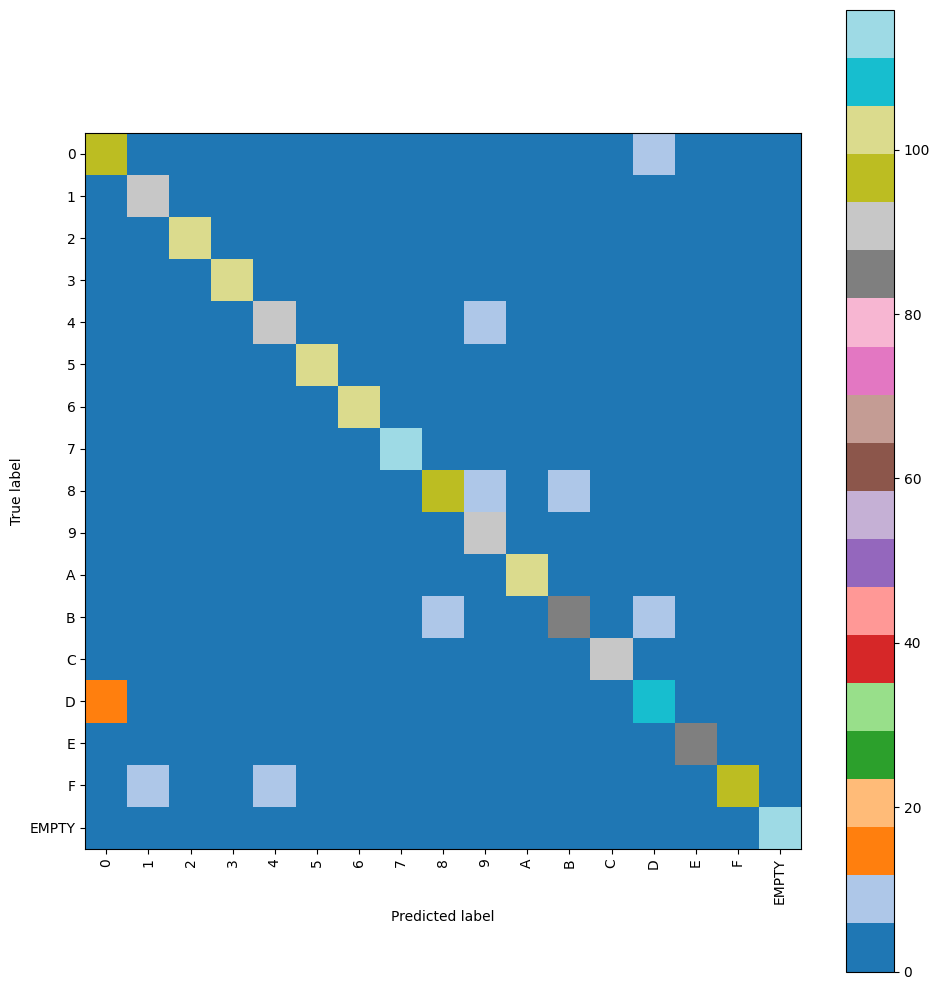

In [16]:
# Create a confusion matrix for Random Forest
rf_cm = metrics.confusion_matrix(y_val, rf_prediction)
utils.generate_confusion_matrix(rf_cm, "confusion_matrix_RF", y_val)
# Plot the confusion matrix for Random Forest
